In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import joblib
from joblib import dump
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
import seaborn as sns

In [40]:
data = pd.read_csv('/content/drive/MyDrive/Iris.csv') #loading the dataset into a data frame

In [41]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [43]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [44]:
data = data.drop('Id', axis = 1) #dropping unnecessary variables

In [45]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [46]:
object_cols = data.select_dtypes('O').columns

object_df = pd.DataFrame({
    'Objects': object_cols,
    'Unique values': [data[col].unique() for col in object_cols],
    'number of unique values':[data[col].nunique()for col in object_cols]
})

object_df

,Objects,Unique values,number of unique values
0,Species,"[Iris-setosa, Iris-versicolor, Iris-virginica]",3


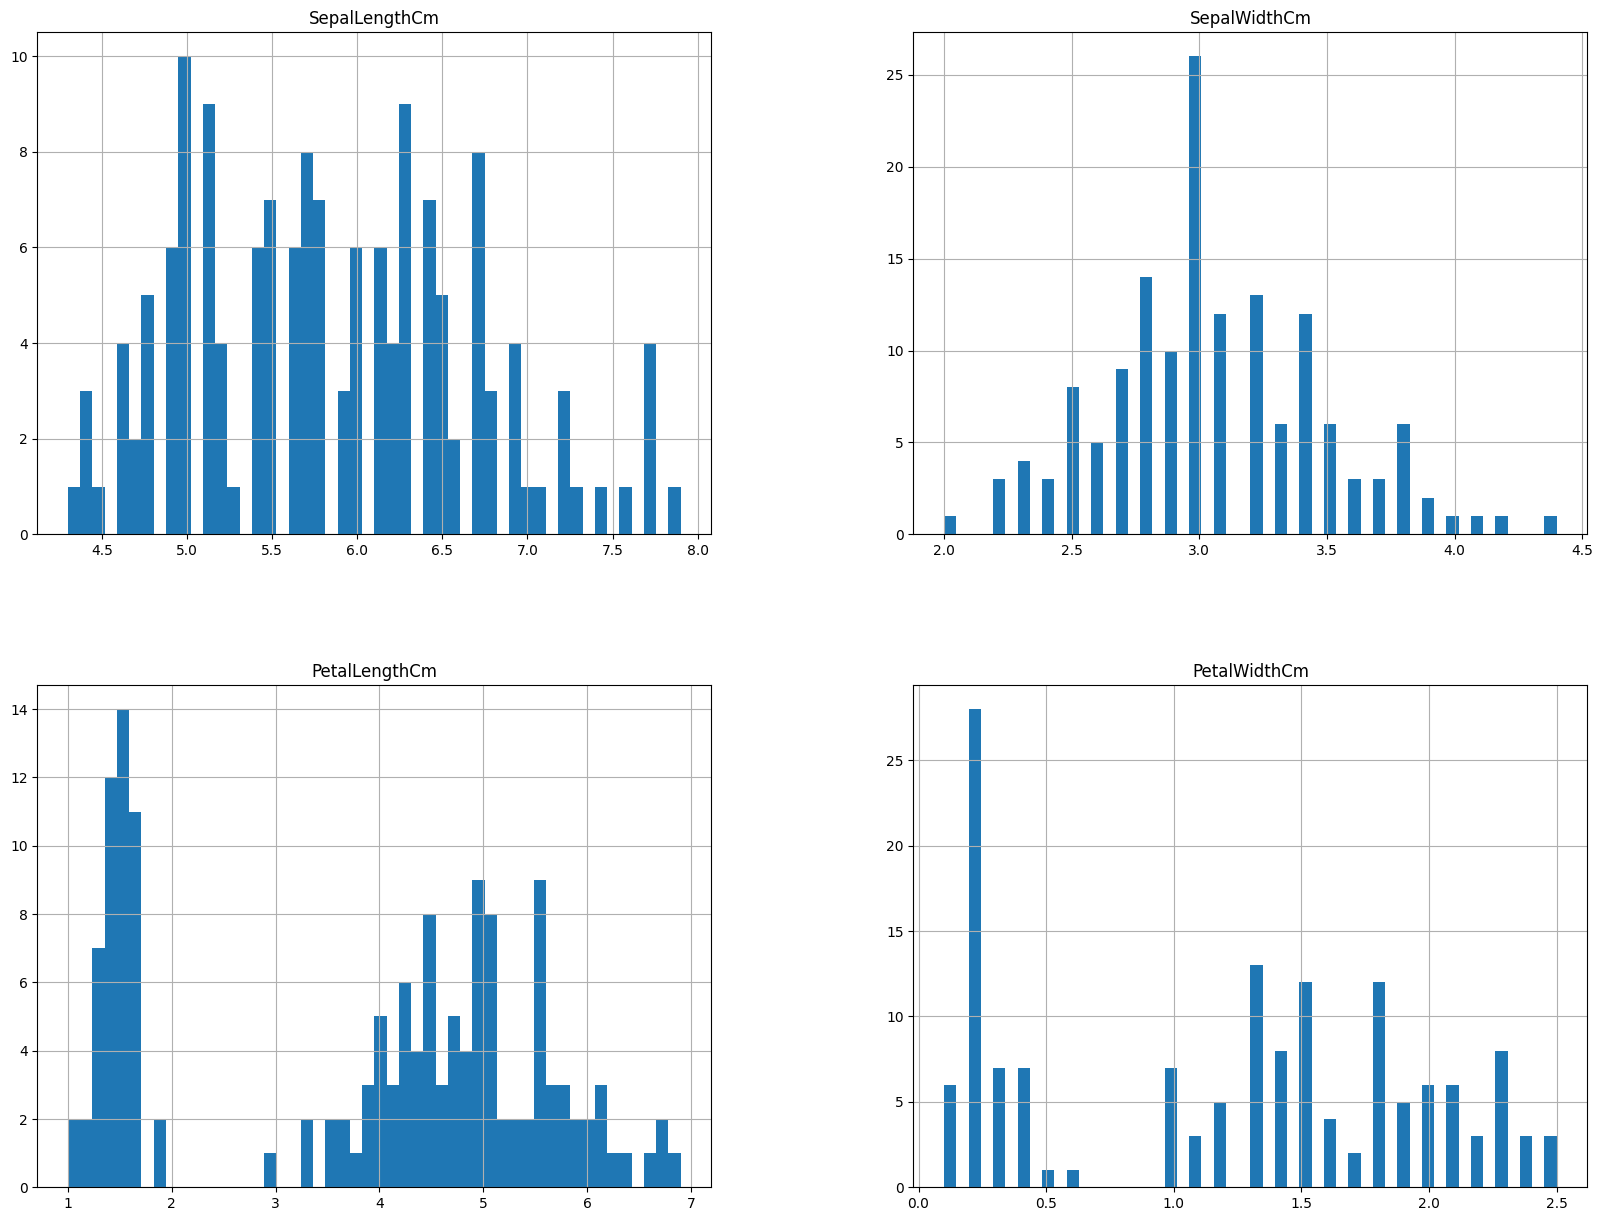

In [47]:
data.hist(bins=50, figsize=(20,15))
plt.show()

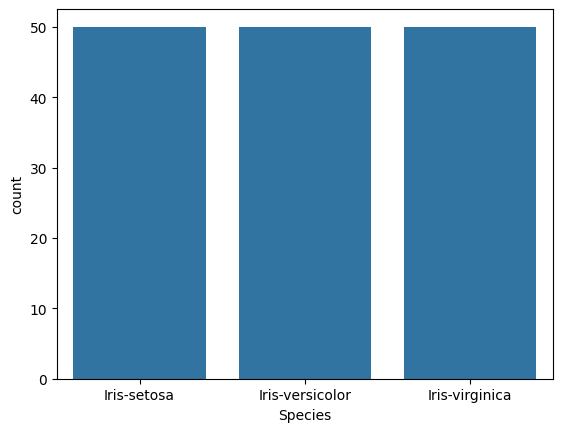

In [48]:
sns.countplot(x='Species', data=data)
plt.show()

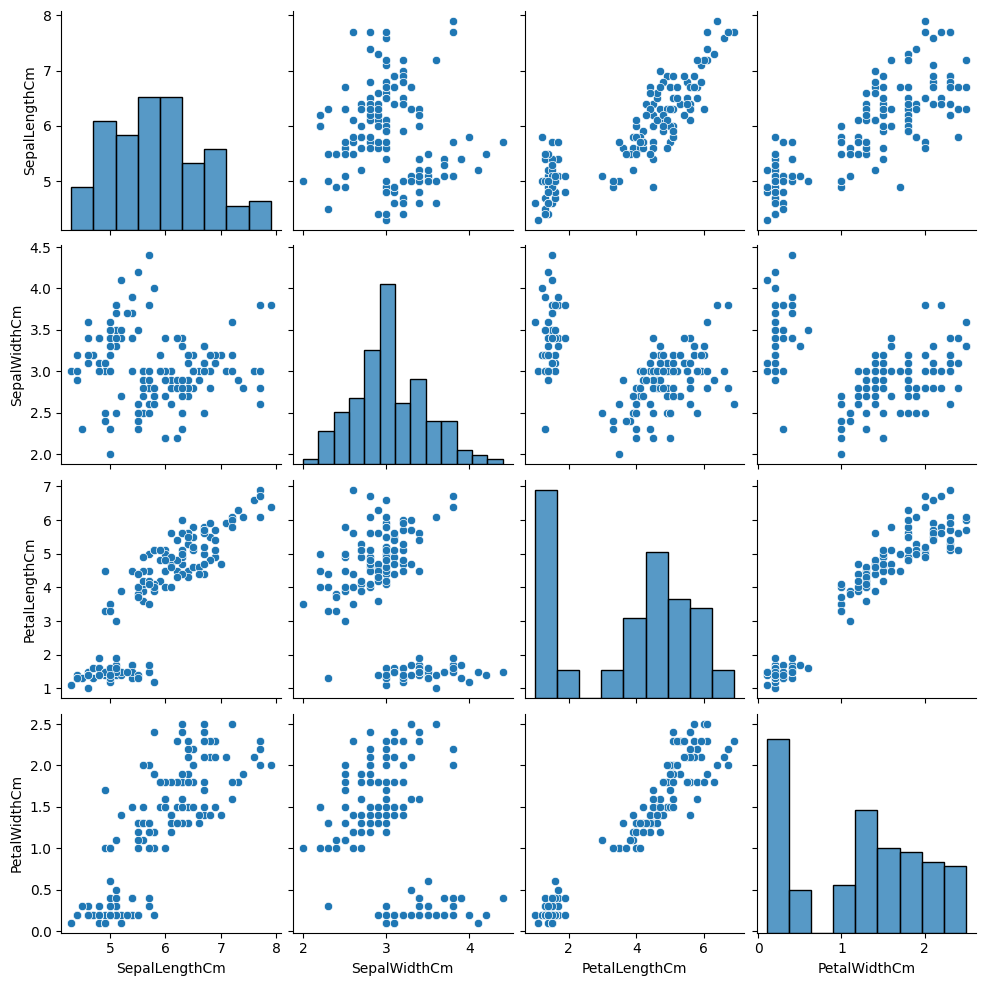

In [49]:
sns.pairplot(data)
plt.show()

In [50]:
encoder = LabelEncoder()

In [51]:
data['Species_encoded'] = encoder.fit_transform(data['Species'])

In [52]:
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [53]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [54]:
data = data.drop('Species', axis=1)

In [55]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [56]:
corr_matrix = data.corr()

In [57]:
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species_encoded,0.782561,-0.419446,0.949043,0.956464,1.000000


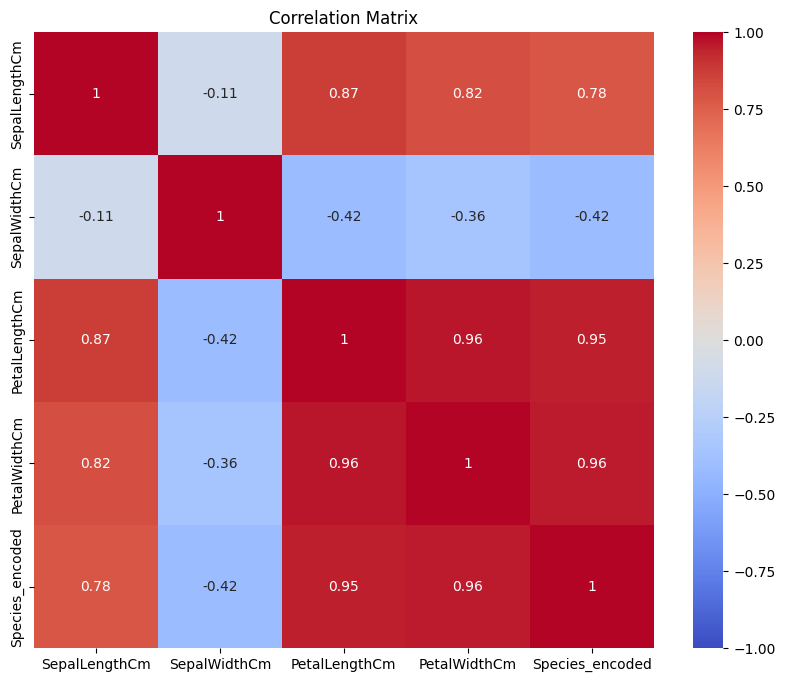

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [59]:
Y = data['Species_encoded']

In [60]:
X = data.drop('Species_encoded', axis = 1)

In [61]:
scaler = StandardScaler()

In [62]:
scaled = scaler.fit_transform(X)
data = pd.DataFrame(scaled, columns=X.columns)
X = data

In [63]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [64]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [65]:
rf=RandomForestClassifier()

In [66]:
rf.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [67]:
rf_pred = rf.predict(Xtest)

In [68]:
accuracy = accuracy_score(Ytest, rf_pred)

In [69]:
accuracy

1.0

In [70]:
report = classification_report(Ytest, rf_pred)

In [71]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [72]:
skf = StratifiedKFold(n_splits=5)

In [73]:
scores = cross_val_score(rf, X, Y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.9        1.        ]
Mean Accuracy: 0.9533333333333334
